Literal 1: Ejecutar con tasa de aprendizaje 0.01
Convergencia alcanzada en la iteración 397
Error cuadrático medio: 0.009184801718990615


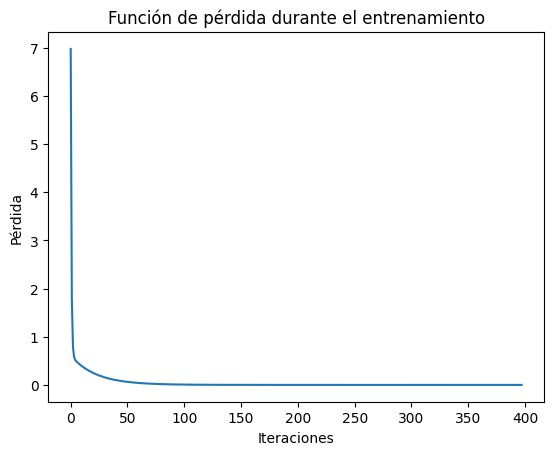

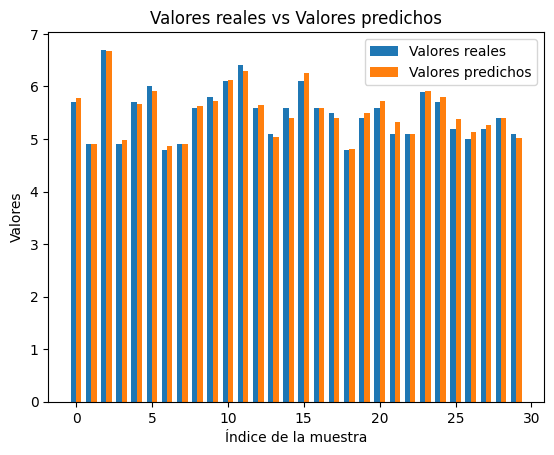


Literal 1: Ejecutar con tasa de aprendizaje 0.1
Advertencia: y_pred contiene NaN
Deteniendo la ejecución debido a NaN en las predicciones

Literal 3: Cambiar variable objetivo a ancho del sépalo
Error cuadrático medio: 0.01101548537203658


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/xk/5r8qcfrs4651xzqmk_try53r0000gn/T/ipykernel_99881/2539996891.py:42: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(errors ** 2)
/var/folders/xk/5r8qcfrs4651xzqmk_try53r0000gn/T/ipykernel_99881/2539996891.py:46: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(history[-1] - history[-2]) < tolerance:
/var/folders/xk/5r8qcfrs4651xzqmk_try53r0000gn/T/ipykernel_99881/2539996891.py:39: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * gradient


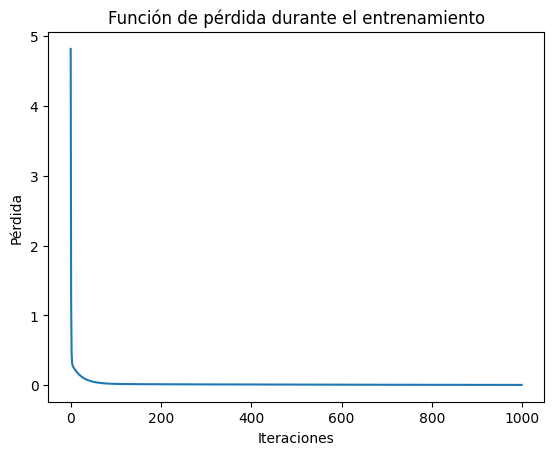

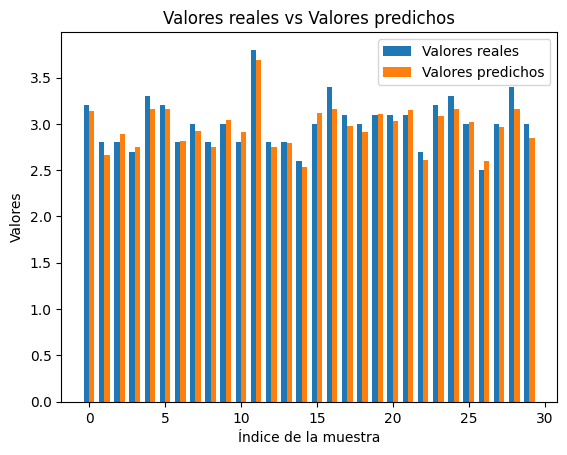


Literal 3: Cambiar variable objetivo a ancho del pétalo
Error cuadrático medio: 0.04704730183437925


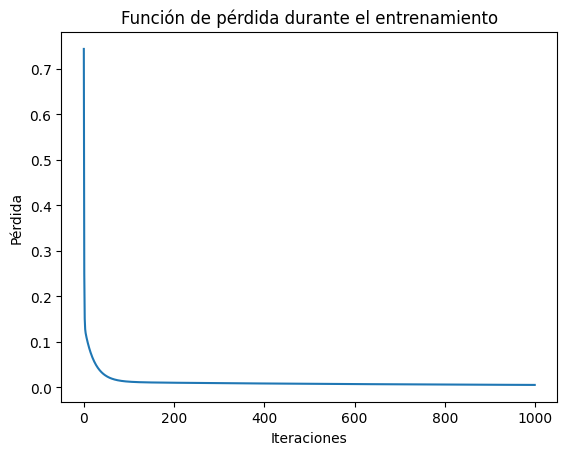

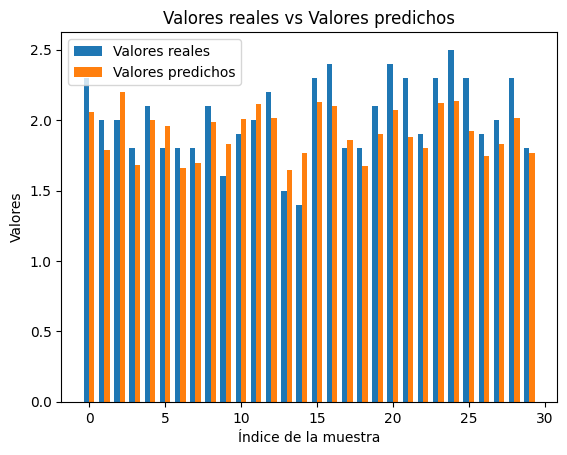

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error

# Cargar los datos de Iris
def load_iris_data():
    iris = load_iris()
    X = iris.data  # Características
    y = X[:, 2]   # Largo del pétalo (por defecto en literal 1 y 2)
    return X, y

# Reemplazar valores NaN con la media de la columna
def replace_nan_with_mean(X):
    # Calcular la media de cada columna ignorando NaN
    col_mean = np.nanmean(X, axis=0)
    # Identificar dónde hay NaN y reemplazar con la media de la columna correspondiente
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_mean, inds[1])
    return X

# Función para verificar si hay NaN en los datos
def check_for_nan(data, name):
    if np.isnan(data).any():
        print(f"Advertencia: {name} contiene NaN")
        return True
    return False

# Gradiente descendente con criterio de parada basado en la función de costo
def gradient_descent(X, y, learning_rate, max_iterations, tolerance=1e-6):
    m = len(y)
    weights = np.zeros(X.shape[1])  # Inicializamos los pesos en 0
    history = []  # Historia de la función de pérdida (costo)

    for i in range(max_iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        weights -= learning_rate * gradient
        
        # Cálculo de la función de costo
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        history.append(cost)

        # Criterio de parada basado en la diferencia de costo
        if i > 0 and abs(history[-1] - history[-2]) < tolerance:
            print(f'Convergencia alcanzada en la iteración {i}')
            break

    return weights, history

# Función para predecir usando los pesos entrenados
def predict(X, weights):
    return X.dot(weights)

# División de datos en conjunto de entrenamiento y prueba
def split_train_test(X, y, test_size=0.2):
    n_test = int(test_size * len(X))
    return X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

# Función para graficar la función de pérdida
def plot_loss_function(history):
    plt.plot(history)
    plt.title("Función de pérdida durante el entrenamiento")
    plt.xlabel("Iteraciones")
    plt.ylabel("Pérdida")
    plt.show()

# Función para graficar valores reales vs. predicciones usando barras
def plot_real_vs_predicted(y_test, y_pred):
    x = np.arange(len(y_test))  # Índices para el gráfico de barras
    width = 0.35  # Ancho de las barras
    plt.bar(x - width/2, y_test, width, label='Valores reales')
    plt.bar(x + width/2, y_pred, width, label='Valores predichos')
    
    plt.xlabel("Índice de la muestra")
    plt.ylabel("Valores")
    plt.title("Valores reales vs Valores predichos")
    plt.legend()
    plt.show()

# Función para ejecutar el estudio de caso
def train_and_evaluate(learning_rate, variable_objetivo='petal_length'):
    # Cargar datos
    X, y = load_iris_data()

    # Cambiar la variable objetivo para el literal 3
    if variable_objetivo == 'sepal_width':
        y = X[:, 1]  # Ancho del sépalo
    elif variable_objetivo == 'petal_width':
        y = X[:, 3]  # Ancho del pétalo

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # Reemplazar valores NaN con la media de la columna
    X_train = replace_nan_with_mean(X_train)
    X_test = replace_nan_with_mean(X_test)

    # Verificar si hay NaN en los datos antes de entrenar
    if check_for_nan(X_train, 'X_train') or check_for_nan(y_train, 'y_train'):
        print("Deteniendo la ejecución debido a NaN en los datos de entrenamiento")
        return
    if check_for_nan(X_test, 'X_test') or check_for_nan(y_test, 'y_test'):
        print("Deteniendo la ejecución debido a NaN en los datos de prueba")
        return

    # Agregar columna de unos para el término de sesgo (bias)
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Entrenar usando gradiente descendente
    weights, history = gradient_descent(X_train, y_train, learning_rate, max_iterations=1000)

    # Predecir valores
    y_pred = predict(X_test, weights)

    # Verificar si las predicciones contienen NaN
    if check_for_nan(y_pred, 'y_pred'):
        print("Deteniendo la ejecución debido a NaN en las predicciones")
        return

    # Calcular y mostrar el error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error cuadrático medio: {mse}")

    # Graficar la función de pérdida
    plot_loss_function(history)

    # Graficar valores reales vs valores predichos
    plot_real_vs_predicted(y_test, y_pred)

# Literal 1: Ejecutar con diferentes tasas de aprendizaje
print("Literal 1: Ejecutar con tasa de aprendizaje 0.01")
train_and_evaluate(learning_rate=0.01)

print("\nLiteral 1: Ejecutar con tasa de aprendizaje 0.1")
train_and_evaluate(learning_rate=0.1)

# Literal 3: Cambiar la variable objetivo
print("\nLiteral 3: Cambiar variable objetivo a ancho del sépalo")
train_and_evaluate(learning_rate=0.01, variable_objetivo='sepal_width')

print("\nLiteral 3: Cambiar variable objetivo a ancho del pétalo")
train_and_evaluate(learning_rate=0.01, variable_objetivo='petal_width')


Regresión polinomial con grado 2:
Error cuadrático medio (MSE) con polinomio de grado 2: 1.1372744716936253e-30


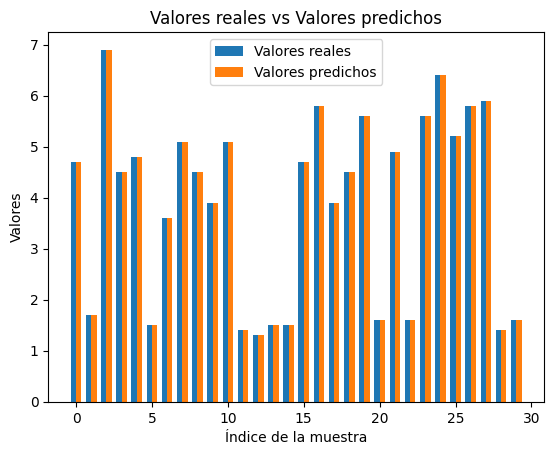


Regresión polinomial con grado 3:
Error cuadrático medio (MSE) con polinomio de grado 3: 7.658853313564499e-29


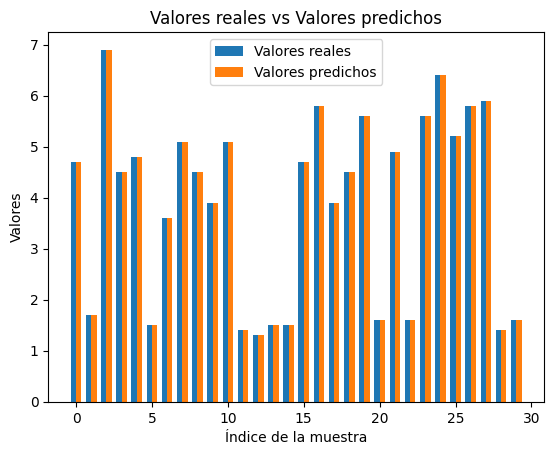


Regresión polinomial con grado 4:
Error cuadrático medio (MSE) con polinomio de grado 4: 8.046096421598332e-26


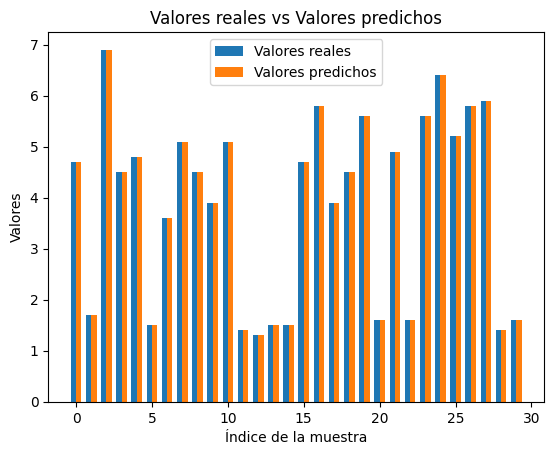

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Cargar los datos de Iris
def load_iris_data():
    iris = load_iris()
    X = iris.data  # Características
    y = X[:, 2]    # Largo del pétalo (o cualquier otra característica para predecir)
    return X, y

# Función para ejecutar la regresión polinomial
def polynomial_regression(degree, variable_objetivo='petal_length'):
    # Cargar datos
    X, y = load_iris_data()

    # Cambiar la variable objetivo si es necesario (por defecto, el largo del pétalo)
    if variable_objetivo == 'sepal_width':
        y = X[:, 1]  # Ancho del sépalo
    elif variable_objetivo == 'petal_width':
        y = X[:, 3]  # Ancho del pétalo

    # Dividir los datos en entrenamiento y prueba (80% - 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Generar características polinómicas
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Entrenar el modelo de regresión lineal usando las características polinómicas
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test_poly)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error cuadrático medio (MSE) con polinomio de grado {degree}: {mse}")

    # Graficar valores reales vs. predicciones usando barras
    plot_real_vs_predicted(y_test, y_pred)

# Función para graficar valores reales vs. predicciones usando barras
def plot_real_vs_predicted(y_test, y_pred):
    x = np.arange(len(y_test))  # Índices para el gráfico de barras
    width = 0.35  # Ancho de las barras
    plt.bar(x - width/2, y_test, width, label='Valores reales')
    plt.bar(x + width/2, y_pred, width, label='Valores predichos')
    
    plt.xlabel("Índice de la muestra")
    plt.ylabel("Valores")
    plt.title("Valores reales vs Valores predichos")
    plt.legend()
    plt.show()

# Ejecutar el modelo de regresión polinomial con diferentes grados
print("Regresión polinomial con grado 2:")
polynomial_regression(degree=2)

print("\nRegresión polinomial con grado 3:")
polynomial_regression(degree=3)

print("\nRegresión polinomial con grado 4:")
polynomial_regression(degree=4)


In [4]:
from sklearn.model_selection import cross_val_score

def polynomial_regression_with_cv(degree, variable_objetivo='petal_length'):
    # Cargar datos
    X, y = load_iris_data()

    if variable_objetivo == 'sepal_width':
        y = X[:, 1]  # Ancho del sépalo
    elif variable_objetivo == 'petal_width':
        y = X[:, 3]  # Ancho del pétalo

    # Generar características polinómicas
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Modelo de regresión lineal
    model = LinearRegression()

    # Realizar validación cruzada
    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5)
    mse = -scores.mean()
    print(f"Error cuadrático medio (MSE) promedio con polinomio de grado {degree}: {mse}")

# Ejecutar validación cruzada con grado 2, 3 y 4
print("Validación cruzada con polinomio de grado 2:")
polynomial_regression_with_cv(degree=2)

print("\nValidación cruzada con polinomio de grado 3:")
polynomial_regression_with_cv(degree=3)

print("\nValidación cruzada con polinomio de grado 4:")
polynomial_regression_with_cv(degree=4)


Validación cruzada con polinomio de grado 2:
Error cuadrático medio (MSE) promedio con polinomio de grado 2: 9.142248724724937e-29

Validación cruzada con polinomio de grado 3:
Error cuadrático medio (MSE) promedio con polinomio de grado 3: 6.283941068013921e-28

Validación cruzada con polinomio de grado 4:
Error cuadrático medio (MSE) promedio con polinomio de grado 4: 4.1685032327114615e-25
